Notebook elaborado para apresentar conceitos sobre a sismicidade do Brasil.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Os dados utilizados nesta demonstração foram obtidos através do catálogo de eventos da [Rede Sismográfica Brasileira (RSBR)](http://rsbr.gov.br/pevjs/evlist.html#brasil)

Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>

<p>&nbsp;</p>
Última modificação: 06/05/2021

# Instruções iniciais

Neste notebook você irá observar uma série de eventos sísmicos registrados no Brasil desde 1903 até o dia 02/05/2021. Leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada. 

In [1]:
# imports e funções

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

### Passo 02 - Carregar os dados

Esta demonstração utilizará dados carregados a partir de um arquivo ASCII em formato .csv contendo uma tabela com os eventos de magnitude acima de 5.0 registrados no catálogo da USGS entre janeiro de 1971 e março de 2021. Execute a célula abaixo para carregar este arquivo.

In [2]:
rsbr = pd.read_csv('rsbr.csv', sep=";", decimal=".", usecols=np.arange(8))

### Passo 03 - Epicentros



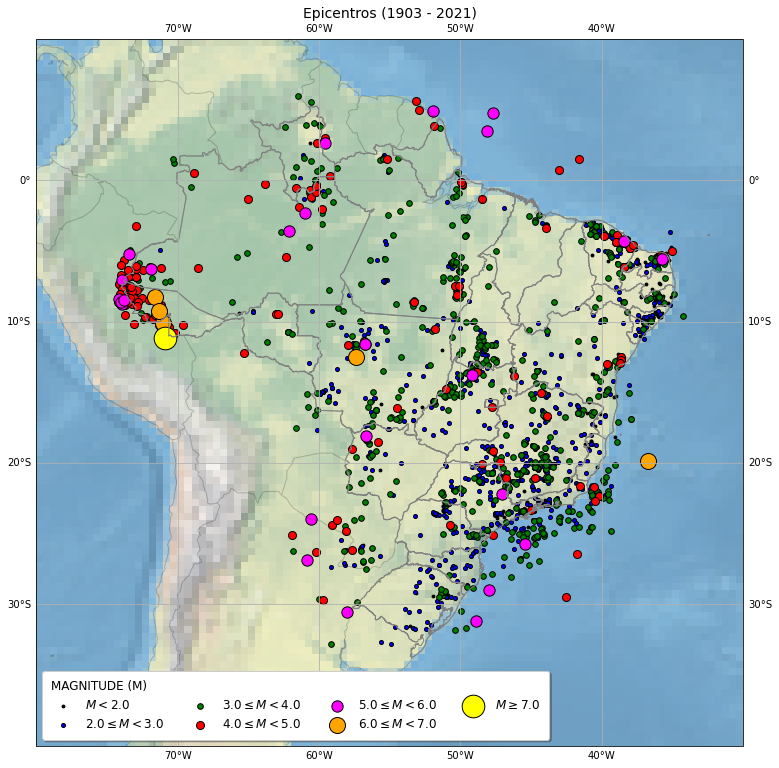

In [3]:
m000_199 = rsbr.loc[(rsbr['magnitude'] >=0.00) & (rsbr['magnitude'] < 1.99)]
m200_299 = rsbr.loc[(rsbr['magnitude'] >=2.00) & (rsbr['magnitude'] < 2.99)]
m300_399 = rsbr.loc[(rsbr['magnitude'] >=3.00) & (rsbr['magnitude'] < 3.99)]
m400_499 = rsbr.loc[(rsbr['magnitude'] >=4.00) & (rsbr['magnitude'] < 4.99)]
m500_599 = rsbr.loc[(rsbr['magnitude'] >=5.00) & (rsbr['magnitude'] < 5.99)]
m600_699 = rsbr.loc[(rsbr['magnitude'] >=6.00) & (rsbr['magnitude'] < 6.99)]
m700 = rsbr.loc[(rsbr['magnitude'] >=7.00)]

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m000_199['longitude'], m000_199['latitude'], s=2**3, c='black', label=r'$M < 2.0$')
ax.scatter(m200_299['longitude'], m200_299['latitude'], edgecolors='k', s=2**4, c='blue', label=r'$2.0 \leq M < 3.0$')
ax.scatter(m300_399['longitude'], m300_399['latitude'], edgecolors='k', s=2**5, c='green', label=r'$3.0 \leq M < 4.0$')
ax.scatter(m400_499['longitude'], m400_499['latitude'], edgecolors='k', s=2**6, c='red', label=r'$4.0 \leq M < 5.0$')
ax.scatter(m500_599['longitude'], m500_599['latitude'], edgecolors='k', s=2**7, c='magenta', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m600_699['longitude'], m600_699['latitude'], edgecolors='k', s=2**8, c='orange', label=r'$6.0 \leq M < 7.0$')
ax.scatter(m700['longitude'], m700['latitude'], edgecolors='k', s=2**9, c='yellow', label=r'$M \geq 7.0$')


leg = ax.legend(loc='lower left', ncol=4, fontsize='large', shadow=True, borderpad=0.75, \
      title='MAGNITUDE (M)', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([-80, -30])
ax.set_ylim([-40, 10])

ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)

shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Epicentros (1903 - 2021)', fontsize=14)
plt.show()

Você consegue perceber algum parão na localização dos epicentros de maiores magnitudes?

### Passo 04 - Hipocentros



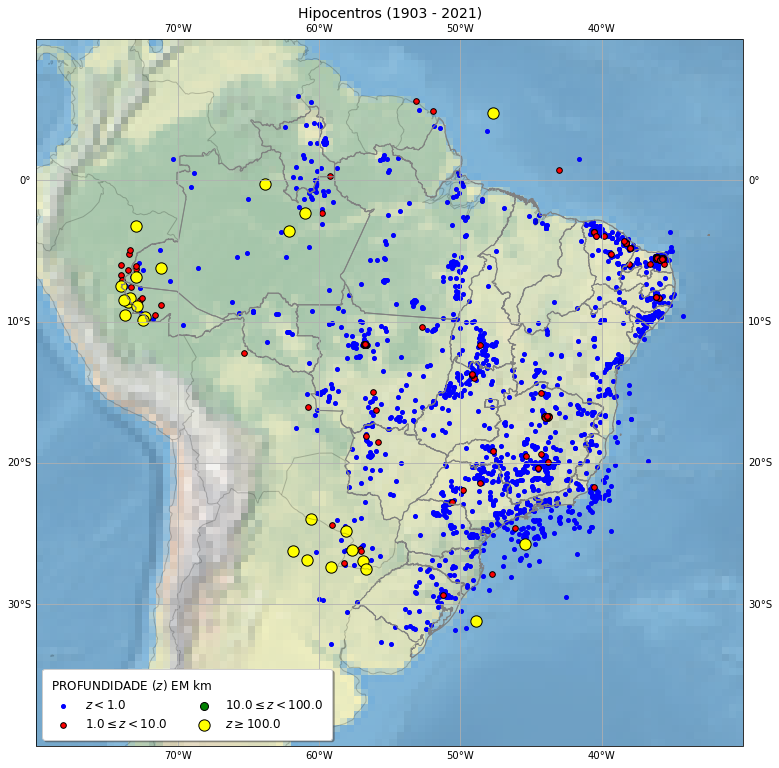

In [4]:
m10 = rsbr.loc[(rsbr['depth'] <=1.0)]
m100 = rsbr.loc[(rsbr['depth'] > 1.0) & (rsbr['depth'] <= 10.0)]
m1000 = rsbr.loc[(rsbr['depth'] > 10.0) & (rsbr['depth'] <= 100.0)]
m10000 = rsbr.loc[(rsbr['depth'] > 100.0)]

fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m10['longitude'], m10['latitude'], s=2**4, c='blue', label=r'$z < 1.0$')
ax.scatter(m100['longitude'], m100['latitude'], edgecolors='k', s=2**5, c='red', label=r'$1.0 \leq z < 10.0$')
ax.scatter(m1000['longitude'], m1000['latitude'], edgecolors='k', s=2**6, c='green', label=r'$10.0 \leq z < 100.0$')
ax.scatter(m1000['longitude'], m1000['latitude'], edgecolors='k', s=2**7, c='yellow', label=r'$z \geq 100.0$')

leg = ax.legend(loc='lower left', ncol=2, fontsize='large', shadow=True, borderpad=0.75, \
      title=r'PROFUNDIDADE ($z$) EM km', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([-80, -30])
ax.set_ylim([-40, 10])

ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)

shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (1903 - 2021)', fontsize=14)
plt.show()

Você percebe algum padrão em relação à profundidade em que os eventos ocorreram, comparando esta informação com o mapa de Epicentros?

### Passo 05 - Minas Gerais

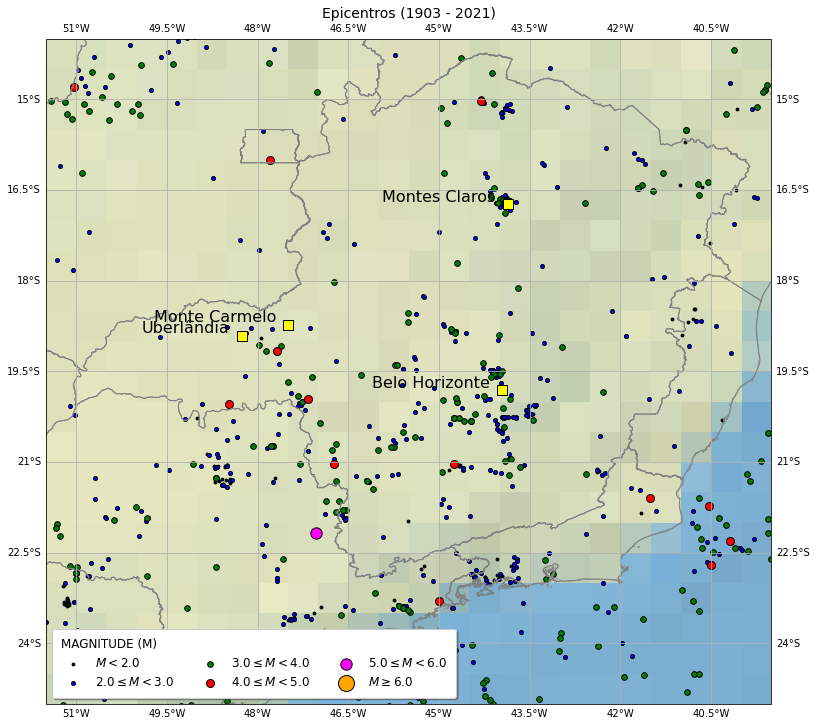

In [5]:
cidades = {'Belo Horizonte': [-19.8157, -43.9542],
           'Uberlândia': [-18.9113, -48.2622],
           'Monte Carmelo': [-18.7348, -47.4963], 
           'Montes Claros': [-16.737, -43.8647]}

lon_min, lon_max = [-51.5, -39.5]
lat_min, lat_max = [-25.0, -14.0]

fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m000_199['longitude'], m000_199['latitude'], s=2**3, c='black', label=r'$M < 2.0$')
ax.scatter(m200_299['longitude'], m200_299['latitude'], edgecolors='k', s=2**4, c='blue', label=r'$2.0 \leq M < 3.0$')
ax.scatter(m300_399['longitude'], m300_399['latitude'], edgecolors='k', s=2**5, c='green', label=r'$3.0 \leq M < 4.0$')
ax.scatter(m400_499['longitude'], m400_499['latitude'], edgecolors='k', s=2**6, c='red', label=r'$4.0 \leq M < 5.0$')
ax.scatter(m500_599['longitude'], m500_599['latitude'], edgecolors='k', s=2**7, c='magenta', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m600_699['longitude'], m600_699['latitude'], edgecolors='k', s=2**8, c='orange', label=r'$M \geq 6.0$')

for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1]-0.2, cidades[k][0], k, horizontalalignment='right', verticalalignment='bottom', fontsize=16)


leg = ax.legend(loc='lower left', ncol=3, fontsize='large', shadow=True, borderpad=0.75, \
      title='MAGNITUDE (M)', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

ax.coastlines(resolution='50m', alpha=0.20)

shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Epicentros (1903 - 2021)', fontsize=14)
plt.show()

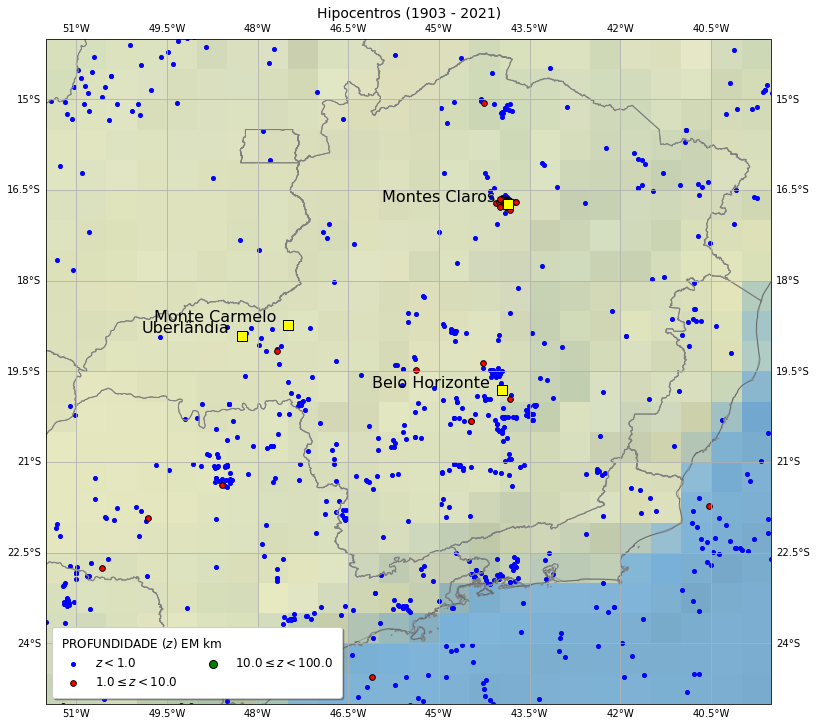

In [6]:
fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m10['longitude'], m10['latitude'], s=2**4, c='blue', label=r'$z < 1.0$')
ax.scatter(m100['longitude'], m100['latitude'], edgecolors='k', s=2**5, c='red', label=r'$1.0 \leq z < 10.0$')
ax.scatter(m1000['longitude'], m1000['latitude'], edgecolors='k', s=2**6, c='green', label=r'$10.0 \leq z < 100.0$')

for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1]-0.2, cidades[k][0], k, horizontalalignment='right', verticalalignment='bottom', fontsize=16)

leg = ax.legend(loc='lower left', ncol=2, fontsize='large', shadow=True, borderpad=0.75, \
      title=r'PROFUNDIDADE ($z$) EM km', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])


shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (1903 - 2021)', fontsize=14)
plt.show()

Veja que há pequenos enxames de eventos próximos às cidades de Montes Claros e Belo Horizonte. O que as magnitudes e profundidades dos eventos lhe sugerem?

### Passo 06 - Sismicidade Induzida: o caso de Bebedouro (SP)



https://www.iag.usp.br/~marcelo/bebedouro/atividade/

https://www.iag.usp.br/~marcelo/bebedouro/Relatorio/Relatorio_Bebedouro_050805.pdf

https://www.iag.usp.br/~marcelo/bebedouro/RelatorioBebedouro_2005-2006.pdf

https://www.iag.usp.br/~marcelo/bebedouro/

https://www2.senado.leg.br/bdsf/bitstream/handle/id/306131/complemento_2.htm?sequence=3


In [7]:
lon_min, lon_max = [-49.2, -47.5]
lat_min, lat_max = [-21.8, -20.5]


cidades = {'Ribeirão Preto': [-21.1767, -47.8208],
           'Bebedouro': [-20.9496, -48.4789]}

beb = pd.read_csv('rsbr.csv', sep=";", decimal=".", usecols=np.arange(8))



beb000_049 = beb.loc[(rsbr['magnitude'] >=0.00) & (beb['magnitude'] < 0.49)]
beb050_099 = beb.loc[(rsbr['magnitude'] >=0.50) & (beb['magnitude'] < 0.99)]
beb100_149 = beb.loc[(rsbr['magnitude'] >=1.00) & (beb['magnitude'] < 1.49)]
beb150_199 = beb.loc[(rsbr['magnitude'] >=1.50) & (beb['magnitude'] < 1.99)]
beb200_249 = beb.loc[(rsbr['magnitude'] >=2.00) & (beb['magnitude'] < 2.49)]
beb250_299 = beb.loc[(rsbr['magnitude'] >=2.50) & (beb['magnitude'] < 2.99)]
beb300_349 = beb.loc[(rsbr['magnitude'] >=3.00) & (beb['magnitude'] < 3.49)]
beb350_399 = beb.loc[(rsbr['magnitude'] >=3.50) & (beb['magnitude'] < 3.99)]
beb400 = beb.loc[(rsbr['magnitude'] >=4.00)]


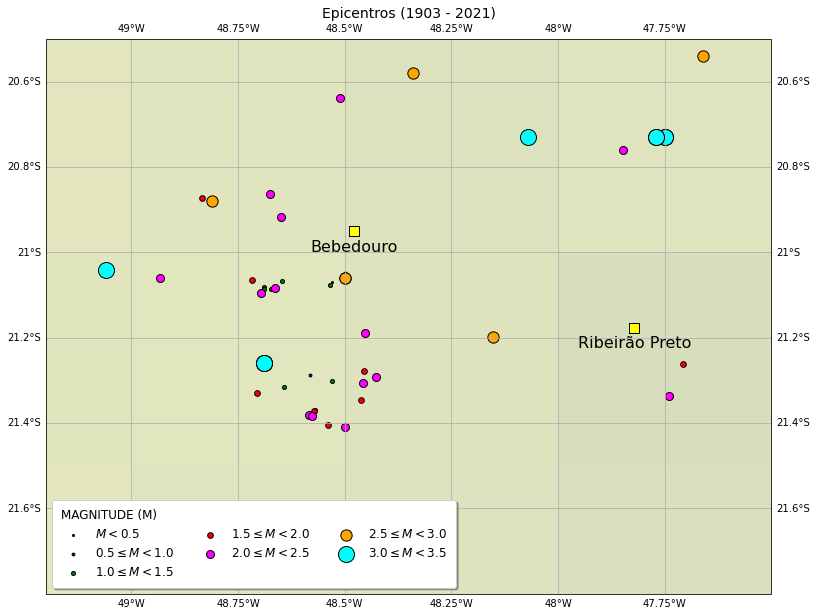

In [8]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(beb000_049['longitude'], beb000_049['latitude'], s=2**2, c='black', label=r'$M < 0.5$')
ax.scatter(beb050_099['longitude'], beb050_099['latitude'], edgecolors='k', s=2**3, c='blue', label=r'$0.5 \leq M < 1.0$')
ax.scatter(beb100_149['longitude'], beb100_149['latitude'], edgecolors='k', s=2**4, c='green', label=r'$1.0 \leq M < 1.5$')
ax.scatter(beb150_199['longitude'], beb150_199['latitude'], edgecolors='k', s=2**5, c='red', label=r'$1.5 \leq M < 2.0$')
ax.scatter(beb200_249['longitude'], beb200_249['latitude'], edgecolors='k', s=2**6, c='magenta', label=r'$2.0 \leq M < 2.5$')
ax.scatter(beb250_299['longitude'], beb250_299['latitude'], edgecolors='k', s=2**7, c='orange', label=r'$2.5 \leq M < 3.0$')
ax.scatter(beb300_349['longitude'], beb300_349['latitude'], edgecolors='k', s=2**8, c='cyan', label=r'$3.0 \leq M < 3.5$')
#ax.scatter(beb350_399['longitude'], beb350_399['latitude'], edgecolors='k', s=2**8, c='cyan', label=r'$3.5 \leq M < 4.0$')
#ax.scatter(beb400['longitude'], beb400['latitude'], edgecolors='k', s=2**9, c='gold', label=r'$M \geq 4.0$')

for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1], cidades[k][0]-0.02, k, horizontalalignment='center', verticalalignment='top', fontsize=16)


leg = ax.legend(loc='lower left', ncol=3, fontsize='large', shadow=True, borderpad=0.75, \
      title='MAGNITUDE (M)', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

ax.coastlines(resolution='50m', alpha=0.20)

shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Epicentros (1903 - 2021)', fontsize=14)
plt.show()

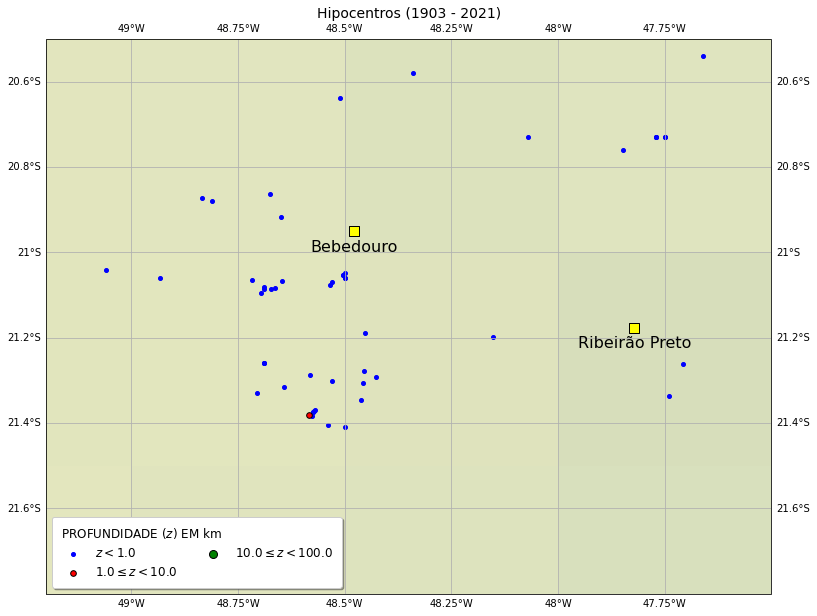

In [10]:
fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m10['longitude'], m10['latitude'], s=2**4, c='blue', label=r'$z < 1.0$')
ax.scatter(m100['longitude'], m100['latitude'], edgecolors='k', s=2**5, c='red', label=r'$1.0 \leq z < 10.0$')
ax.scatter(m1000['longitude'], m1000['latitude'], edgecolors='k', s=2**6, c='green', label=r'$10.0 \leq z < 100.0$')


for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1], cidades[k][0]-0.02, k, horizontalalignment='center', verticalalignment='top', fontsize=16)


leg = ax.legend(loc='lower left', ncol=2, fontsize='large', shadow=True, borderpad=0.75, \
      title=r'PROFUNDIDADE ($z$) EM km', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])


shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (1903 - 2021)', fontsize=14)
plt.show()

### Passo 07 - Sismicidade Natural: os sismos de João Câmara (RN)


https://library.seg.org/doi/abs/10.1190/sbgf2013-409

https://www.researchgate.net/profile/Francisco-Bezerra-6/publication/288360373_Review_of_Seismicity_and_Neogene_Tectonics_in_Northeastern_Brazil/links/5683dd2d08ae051f9af035a1/Review-of-Seismicity-and-Neogene-Tectonics-in-Northeastern-Brazil.pdf

https://www.sciencedirect.com/science/article/pii/S0895981120306271

https://academic.oup.com/gji/article/202/3/1453/606045?login=true

In [11]:
lon_min, lon_max = [-36.5, -34.8]
lat_min, lat_max = [-6.0, -5.0]

cidades = {'Natal': [-5.79448, -35.211],
           'João Câmara': [-5.54387, -35.8145]}

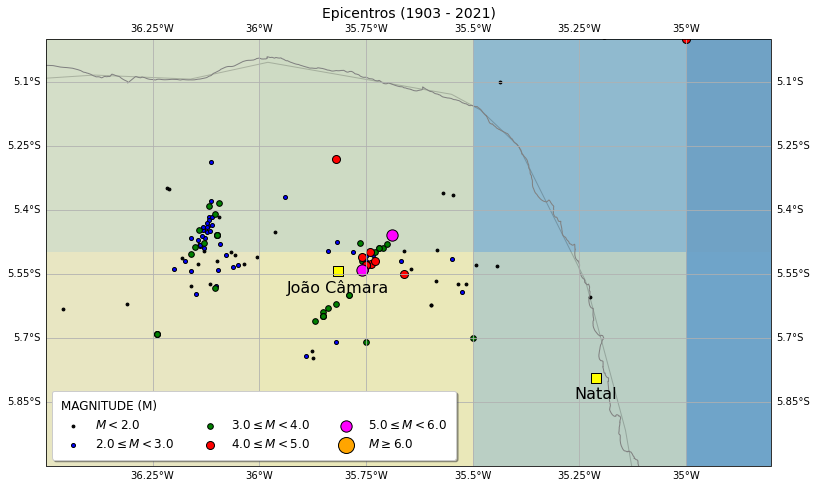

In [12]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m000_199['longitude'], m000_199['latitude'], s=2**3, c='black', label=r'$M < 2.0$')
ax.scatter(m200_299['longitude'], m200_299['latitude'], edgecolors='k', s=2**4, c='blue', label=r'$2.0 \leq M < 3.0$')
ax.scatter(m300_399['longitude'], m300_399['latitude'], edgecolors='k', s=2**5, c='green', label=r'$3.0 \leq M < 4.0$')
ax.scatter(m400_499['longitude'], m400_499['latitude'], edgecolors='k', s=2**6, c='red', label=r'$4.0 \leq M < 5.0$')
ax.scatter(m500_599['longitude'], m500_599['latitude'], edgecolors='k', s=2**7, c='magenta', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m600_699['longitude'], m600_699['latitude'], edgecolors='k', s=2**8, c='orange', label=r'$M \geq 6.0$')

for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1], cidades[k][0]-0.02, k, horizontalalignment='center', verticalalignment='top', fontsize=16)


leg = ax.legend(loc='lower left', ncol=3, fontsize='large', shadow=True, borderpad=0.75, \
      title='MAGNITUDE (M)', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

ax.coastlines(resolution='50m', alpha=0.20)

shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Epicentros (1903 - 2021)', fontsize=14)
plt.show()

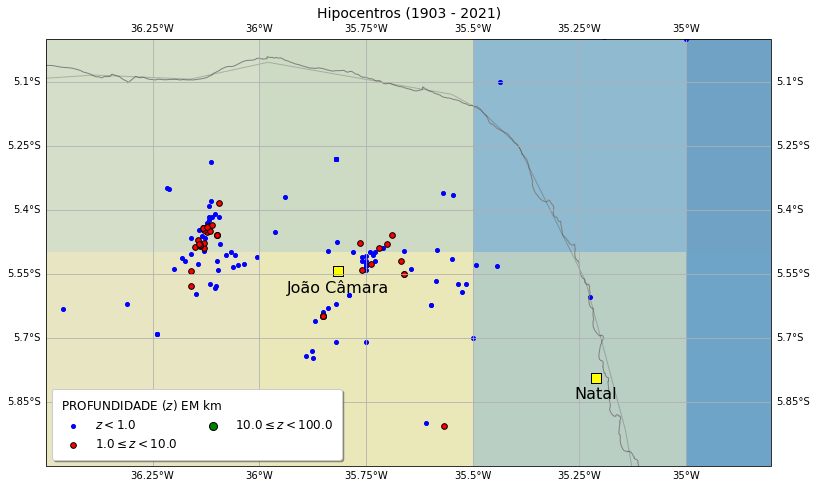

In [13]:
fig = plt.figure(figsize=(13, 13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ax.scatter(m10['longitude'], m10['latitude'], s=2**4, c='blue', label=r'$z < 1.0$')
ax.scatter(m100['longitude'], m100['latitude'], edgecolors='k', s=2**5, c='red', label=r'$1.0 \leq z < 10.0$')
ax.scatter(m1000['longitude'], m1000['latitude'], edgecolors='k', s=2**6, c='green', label=r'$10.0 \leq z < 100.0$')


for k in cidades.keys():
    ax.scatter(cidades[k][1], cidades[k][0], marker='s', s=2**6.5, c='yellow', edgecolors='k')
    ax.text(cidades[k][1], cidades[k][0]-0.02, k, horizontalalignment='center', verticalalignment='top', fontsize=16)


leg = ax.legend(loc='lower left', ncol=2, fontsize='large', shadow=True, borderpad=0.75, \
      title=r'PROFUNDIDADE ($z$) EM km', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])


shape_feature = ShapelyFeature(Reader('UFEBRASIL.shp').geometries(), ccrs.PlateCarree(), facecolor='none', \
                               linewidth=1, edgecolor = (0.5, 0.5, 0.5, 1))
ax.add_feature(shape_feature, linestyle='-')


ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (1903 - 2021)', fontsize=14)
plt.show()

https://www.earthdoc.org/content/papers/10.3997/2214-4609-pdb.197.SBGF_2245